In [4]:
def matmul000(a, b):
    ah, aw = a.shape
    bh, bw = b.shape
    assert(aw==bh)
    return torch.matmul(a, b) # also a@b, though @ is actually much more general

In [12]:
dat = generateRandomDataset(datasetSize=10000, maxTrials=10000, nStates=4, symbols=['a', 'b'])

0 / 10000  datasetSize: 0
100 / 10000  datasetSize: 95
200 / 10000  datasetSize: 185
300 / 10000  datasetSize: 272
400 / 10000  datasetSize: 359
500 / 10000  datasetSize: 449
600 / 10000  datasetSize: 541
700 / 10000  datasetSize: 624
800 / 10000  datasetSize: 709
900 / 10000  datasetSize: 787
1000 / 10000  datasetSize: 869
1100 / 10000  datasetSize: 945
1200 / 10000  datasetSize: 1020
1300 / 10000  datasetSize: 1099
1400 / 10000  datasetSize: 1173
1500 / 10000  datasetSize: 1247
1600 / 10000  datasetSize: 1317
1700 / 10000  datasetSize: 1391
1800 / 10000  datasetSize: 1463
1900 / 10000  datasetSize: 1525
2000 / 10000  datasetSize: 1589
2100 / 10000  datasetSize: 1651
2200 / 10000  datasetSize: 1718
2300 / 10000  datasetSize: 1787
2400 / 10000  datasetSize: 1845
2500 / 10000  datasetSize: 1902
2600 / 10000  datasetSize: 1960
2700 / 10000  datasetSize: 2019
2800 / 10000  datasetSize: 2075
2900 / 10000  datasetSize: 2133
3000 / 10000  datasetSize: 2189
3100 / 10000  datasetSize: 2251
320

In [14]:
import automataUtil
import cloudpickle
f = open("size4Dataset.json", "wb")
cloudpickle.dump([automataUtil.automataFromNetworkx(x, ['a', 'b']) for x in dat], f)
f.close()

In [ ]:
symbols = ['a', 'b']
graphs = getAllAutomataOfSize(4,symbols)
print(f"there are {len(graphs)} graphs")
minimized = minimizeGraphs(graphs, symbols)

In [ ]:
deduplicated = removeIsomorphic(minimized)
print(f"there are {len(deduplicated)} non-isomorphic minimized graphs")

defaultdict(<function <lambda> at 0x7fbe59cc1e50>, {1: 1})


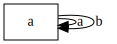

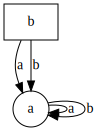

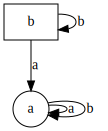

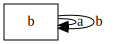

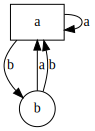

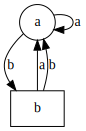

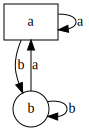

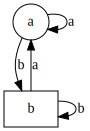

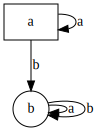

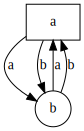

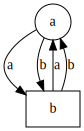

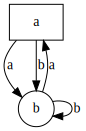

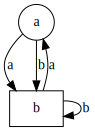

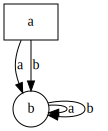

defaultdict(<function <lambda> at 0x7fbe59cc1e50>, {1: 3, 2: 12, 3: 286})


In [191]:
from collections import defaultdict
counts = defaultdict(lambda: 0)
print(counts)


for i, g in enumerate(deduplicated):
    a = automataBattle.automataFromNetworkx(g, symbols)
    counts[len(a.states)] += 1
    if len(a.states) < 3:
        display(a.toDot())
print(counts)

In [61]:
def matmul00(a, b):
    ah, aw = a.shape
    bh, bw = b.shape
    assert(aw==bh)
    return torch.einsum("ik,kj->ij", a, b)

In [169]:
def matmul0(a, b):
    ah, aw = a.shape
    bh, bw = b.shape
    assert(aw==bh)
    c = torch.zeros([ah,bw])
    for y in range(ah):
        c[y] = ((a[y][:,None]*b).sum(axis=0)) # access row, then turn it into a column, then multiply will broadcast it into a repeated column as we want. Now we want to sum along axis=0 since that's vertical, which is the dot product we are doing.
    return c

In [170]:
def matmul1(a, b):
    ah, aw = a.shape
    bh, bw = b.shape
    assert(aw==bh)
    c = torch.zeros([ah,bw])
    for y in range(ah):
        c[y] = ((a[y]*b.T).sum(axis=1)) # broadcast and multiply by each column (now rows because .T), then sum each row. Axis=1 because we are looping through columsn to do summing, not rows (which is axis=0)
    return c

In [171]:
def matmul2(a, b):
    ah, aw = a.shape
    bh, bw = b.shape
    assert(aw==bh)
    c = torch.zeros([ah,bw])
    for y in range(ah):
        for x in range(bw):
            for k in range(aw):
                c[y,x] += a[y,k]*b[k,x]
    return c

In [172]:
def matmul3(a, b):
    ah, aw = a.shape
    bh, bw = b.shape
    assert(aw==bh)
    c = torch.zeros([ah,bw])
    for y in range(ah):
        for x in range(bw):
            c[y,x] = (a[y]*b[:,x]).sum()
    return c

In [2]:
import torch
from torch import tensor

a = torch.tensor([[10, 2, 3], [-2, 5, 1]])

b = torch.tensor([[30, 2], [20, 1], [1, -3]])

print(torch.tensor([4]).expand_as(b.T))

#b.T, a[0], a[0]*b.T, (a[0]*b.T).sum(axis=1)

a, a[0][:,None].expand_as(b)

tensor([[4, 4, 4],
        [4, 4, 4]])


(tensor([[10,  2,  3],
         [-2,  5,  1]]),
 tensor([[10, 10],
         [ 2,  2],
         [ 3,  3]]))

In [178]:
a = torch.rand([100, 200])
b = torch.rand([200, 40])
%timeit -n 10 t1=matmul000(a,b)
%timeit -n 10 t2=matmul00(a,b)
%timeit -n 10  t3=matmul0(a,b)
%time  t4=matmul1(a,b)
%time t5=matmul2(a,b)
%time t6=matmul3(a,b)

22.7 µs ± 9.09 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
57.8 µs ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.45 ms ± 762 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Wall time: 3.02 ms
Wall time: 15.1 s
Wall time: 76.8 ms


In [98]:
# This will expand it, but when you look at storage it only stores it once

c = torch.tensor([1, 4, 6])
d = torch.tensor([[10, 2, 3], [-2, 5, 1], [3,2,1]])
t = c.expand_as(d)
t, t.storage(), t.stride(), t.shape
# The stride is (0,1) since for columns it moves through the data hopping along 1 each time, but for rows it moves along 0 each time (thus it stays in the same place)





(tensor([[1, 4, 6],
         [1, 4, 6],
         [1, 4, 6]]),
  1
  4
  6
 [torch.LongStorage of size 3],
 (0, 1),
 torch.Size([3, 3]))

In [121]:
# Unsqueeze adds a length 1 dimension at the desired spot
c = torch.tensor([1, 4, 6])
c.unsqueeze(0), c.unsqueeze(0).shape, c.unsqueeze(1), c.unsqueeze(1).shape
d = torch.tensor([[10, 2, 3], [-2, 5, 1], [3,2,1]])
d.unsqueeze(0), d.unsqueeze(0).shape, d.unsqueeze(1), d.unsqueeze(1).shape, d.unsqueeze(2), d.unsqueeze(2).shape
# Shorthand notation:
print(c[None], c[None].shape, c[:,None], c[:,None].shape)
print(d[None], d[None].shape, d[:,None], d[:,None].shape, d[:,:,None], d[:,:,None].shape)

tensor([[1, 4, 6]]) torch.Size([1, 3]) tensor([[1],
        [4],
        [6]]) torch.Size([3, 1])
tensor([[[10,  2,  3],
         [-2,  5,  1],
         [ 3,  2,  1]]]) torch.Size([1, 3, 3]) tensor([[[10,  2,  3]],

        [[-2,  5,  1]],

        [[ 3,  2,  1]]]) torch.Size([3, 1, 3]) tensor([[[10],
         [ 2],
         [ 3]],

        [[-2],
         [ 5],
         [ 1]],

        [[ 3],
         [ 2],
         [ 1]]]) torch.Size([3, 3, 1])


In [139]:
d = torch.tensor([[10, 2, 3], [-2, 5, 1], [3,2,1]])
# ... anywhere means that after it you are working from the last axis backwards, instead of the first axis forwards.
d[0,...,0]


tensor(10)

The general rule is that they start from the last axis and work backwards. Each axis is compatible if:

1. They are the same size
2. One of them is 1, in which case it is broadcasted to be the same size as the other axis

If one thing has less axis, it still starts from the last axis of both things and works backwards.



In [154]:
a = torch.zeros([3,10,4])

a*(torch.zeros([3])[:,None,None])
a*(torch.zeros([10])[:,None])
a*(torch.zeros([4]))
a*torch.zeros([3,1,1])
a*torch.zeros([1,10,1])
a*torch.zeros([1,1,4])
a*torch.zeros([3,1,4])
a*torch.zeros([1,10,4])
# etc

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [155]:

a = torch.tensor([[10, 2, 3], [-2, 5, 1]])

b = torch.tensor([[30, 2], [20, 1], [1, -3]])

print(torch.einsum("ik,kj->ij", a, b))

tensor([[343,  13],
        [ 41,  -2]])


In [189]:
data_x = torch.normal(0.0, 1.0, [1000, 720])
data_y = torch.randint()

tensor([[-0.2952, -0.9341, -0.4223, -1.0190,  0.2456, -0.6133, -1.4080, -1.3623,
          0.4348,  0.2256],
        [ 0.5693, -0.2497,  0.9739,  0.2206,  1.3143,  1.3304,  1.0459,  0.0500,
          1.0873,  0.6846],
        [-0.1863, -0.3399, -1.2109, -1.9753,  0.5485, -2.0030, -1.3316,  0.2011,
         -0.6782, -0.5050],
        [ 0.7071, -0.8895,  0.7457, -0.2768, -1.1438, -2.4894, -0.5299, -0.4752,
          2.3249,  1.3471],
        [ 0.1760, -2.4201, -1.1801,  1.0719, -2.3071,  2.1724,  0.0092, -0.2826,
         -0.4482,  1.8626],
        [-0.7799,  0.9627,  1.3358,  0.3358,  0.0445, -0.4429, -1.4348, -1.5696,
          0.5019,  0.7517],
        [-0.3472,  0.2741,  0.0111,  1.3033, -0.6587,  0.5325, -0.0851,  0.6103,
         -1.6681,  1.7016],
        [-1.2076, -1.3069, -0.2687,  0.2841, -1.6222,  1.4335, -0.5556, -1.1500,
         -0.1205,  1.2446],
        [-0.8119,  0.8948, -0.8631,  0.0553,  0.4175, -0.8051, -0.4708,  0.5994,
         -0.5824, -0.1118],
        [ 0.1029, -

In [5]:
a = torch.zeros([10, 20, 3]).numel() # numel multiplies all the dimensions together, useful for finding size of input or output
a

600